In [1]:
patient = "03421"
base_dir = "data/PXD034772/DDA"
sample = [
    "03421-02",
    "03421-03",
    "03421-05",
    "03421-06",
    "03421-07",
    "03421-08",
    "03421-10",
]

In [2]:
import numpy as np

def get_unique_pep_num_from_pfind_result(fname, min_pep_length=8, max_pep_length=14):
    df = pd.read_table(fname)
    unique_pep_pfind = df["Sequence"].tolist()
    unique_pep_pfind = np.unique(unique_pep_pfind)
    unique_pep_pfind = [element for element in unique_pep_pfind if ((len(element)>=min_pep_length) & (len(element)<=max_pep_length))]
    return unique_pep_pfind

In [3]:
import pandas as pd
unique_pep_pfind_whole_db = []
for i in range(len(sample)):
    file = f"{base_dir}/{patient}/{sample[i]}/result/pFind-Filtered.spectra"
    df = pd.read_table(file)
    unique_pep_pfind_whole_db += get_unique_pep_num_from_pfind_result(file)
    
unique_pep_pfind_whole_db = np.unique(unique_pep_pfind_whole_db)
len(unique_pep_pfind_whole_db)

24079

In [4]:
unique_pep_pfind_reduced_db = []
for i in range(len(sample)):
    file = f"{base_dir}/{patient}/{sample[i]}-0819/result/pFind-Filtered.spectra"
    df = pd.read_table(file)
    unique_pep_pfind_reduced_db += get_unique_pep_num_from_pfind_result(file)

unique_pep_pfind_reduced_db = np.unique(unique_pep_pfind_reduced_db)
len(unique_pep_pfind_reduced_db)

28042

In [5]:
intersection = set(unique_pep_pfind_whole_db).intersection(set(unique_pep_pfind_reduced_db))
intersection = list(intersection)
len(intersection)

19594

In [6]:
with open(f"{base_dir}/{patient}/intersection.txt", "w") as f:
    for i in range(len(intersection)):
        f.write(f"{intersection[i]}\n")

In [7]:
difference_list1 = set(unique_pep_pfind_whole_db).difference(set(unique_pep_pfind_reduced_db))
difference_list1 = list(difference_list1)
len(difference_list1)
with open(f"{base_dir}/{patient}/whole_db_unique.txt", "w") as f:
    for i in range(len(difference_list1)):
        f.write(f"{difference_list1[i]}\n")

In [8]:
difference_list2 = set(unique_pep_pfind_reduced_db).difference(set(unique_pep_pfind_whole_db))
difference_list2 = list(difference_list2)
len(difference_list2)
with open(f"{base_dir}/{patient}/reduced_db_unique.txt", "w") as f:
    for i in range(len(difference_list2)):
        f.write(f"{difference_list2[i]}\n")

In [ ]:
# ./MixMHCpred -i ../../../test_cjt/data/PXD034772/DDA/03421/intersection.txt -o ../../../test_cjt/data/PXD034772/DDA/03421/intersection_out.txt -a A0101,A0201,B0801,C0202,C0701
# ./MixMHCpred -i ../../../test_cjt/data/PXD034772/DDA/03421/whole_db_unique.txt -o ../../../test_cjt/data/PXD034772/DDA/03421/whole_db_unique_out.txt -a A0101,A0201,B0801,C0202,C0701
# ./MixMHCpred -i ../../../test_cjt/data/PXD034772/DDA/03421/reduced_db_unique.txt -o ../../../test_cjt/data/PXD034772/DDA/03421/reduced_db_unique_out.txt -a A0101,A0201,B0801,C0202,C0701

In [9]:
df1 = pd.read_table(f"{base_dir}/{patient}/reduced_db_unique_out.txt", skiprows=11)
ratio1 = df1[df1["%Rank_bestAllele"] <= 2].shape[0] / df1.shape[0]

In [10]:
df2 = pd.read_table(f"{base_dir}/{patient}/whole_db_unique_out.txt", skiprows=11)
ratio2 = df2[df2["%Rank_bestAllele"] <= 2].shape[0] / df2.shape[0]

In [11]:
df3 = pd.read_table(f"{base_dir}/{patient}/intersection_out.txt", skiprows=11)
ratio3 = df3[df3["%Rank_bestAllele"] <= 2].shape[0] / df3.shape[0]

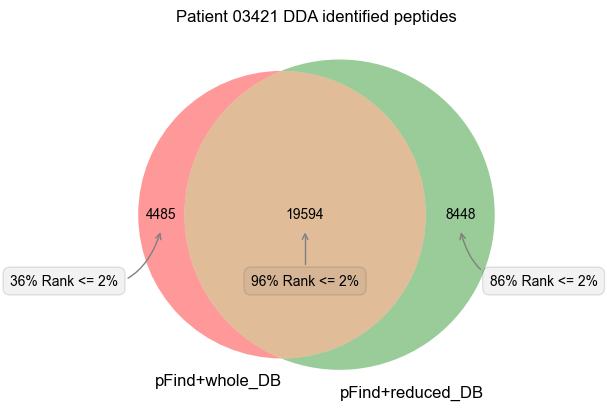

In [12]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import numpy as np

plt.rcParams['font.family'] = 'Arial'
# 使用venn2函数绘制韦恩图
v = venn2(subsets=(set(unique_pep_pfind_whole_db), set(unique_pep_pfind_reduced_db)), set_labels=('pFind+whole_DB', 'pFind+reduced_DB'))

plt.annotate(f'{ratio3*100:.0f}% Rank <= 2%', xy=v.get_label_by_id('11').get_position() - np.array([0, 0.05]), xytext=(0,-40),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='angle',color='gray'))
plt.annotate(f'{ratio2*100:.0f}% Rank <= 2%', xy=v.get_label_by_id('10').get_position() - np.array([0, 0.05]), xytext=(-70,-40),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
plt.annotate(f'{ratio1*100:.0f}% Rank <= 2%', xy=v.get_label_by_id('01').get_position() - np.array([0, 0.05]), xytext=(60,-40),
             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5',color='gray'))
# 添加标题和显示图形
plt.title(f"Patient {patient} DDA identified peptides")
plt.savefig(f"{base_dir}/{patient}/Patient{patient}.svg", dpi=300)